In [ ]:
!pip install lets-plot

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from lets_plot import *
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
LetsPlot.setup_html()



df = pd.read_csv('/content/wine-training.csv')

df.head(5)

# replacements = [{
#     'replace_job': {'admin.': 0, 'blue-collar': 1, 'technician': 2, 'services': 3,
#                     'management': 4, 'retired': 5, 'entrepreneur': 6,
#                     'self-employed': 7, 'housemaid': 8, 'unemployed': 9,
#                     'student': 10, 'unknown': 11},
#     'replace_marital': {'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3},
#     'replace_education': {'university.degree': 0, 'high.school': 1, 'basic.9y': 2,
#                           'professional.course': 3, 'basic.4y': 4, 'basic.6y': 5,
#                           'unknown': 6, 'illiterate': 7},
#     'replace_default': {'no': 0,'yes': 1,'unknown': 2},
#     'replace_housing': {'yes': 1, 'no': 0, 'unknown': 2},
#     'replace_loan': {'no': 0, 'yes': 1, 'unknown': 2},
#     'replace_contact': {'cellular': 0, 'telephone': 1},
#     'replace_month': {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4,
#                       'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9,
#                       'nov': 10, 'dec': 11},
#     'replace_day_of_week': {'thu': 3, 'mon': 0, 'wed': 2, 'tue': 1, 'fri': 4},
#     'replace_poutcome': {'nonexistent': 2, 'failure': 0, 'success': 2},
#     'replace_y': {'no': 0, 'yes': 1}
# }]

# for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']:
#     replace_key = f'replace_{i}'
#     replacement_dict = replacements[0].get(replace_key, {})
#     if replacement_dict:
#         df[i] = df[i].replace(replacement_dict)

# df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline,wine
0,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
1,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,1
3,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
4,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2


['nonflavanoid_phenols', 'od', 'malic_acid', 'proline', 'hue', 'color_intensity', 'total_phenols', 'alcalinity_of_ash', 'alcohol', 'flavanoids', 'wine', 'magnesium', 'proanthocyanins', 'ash']


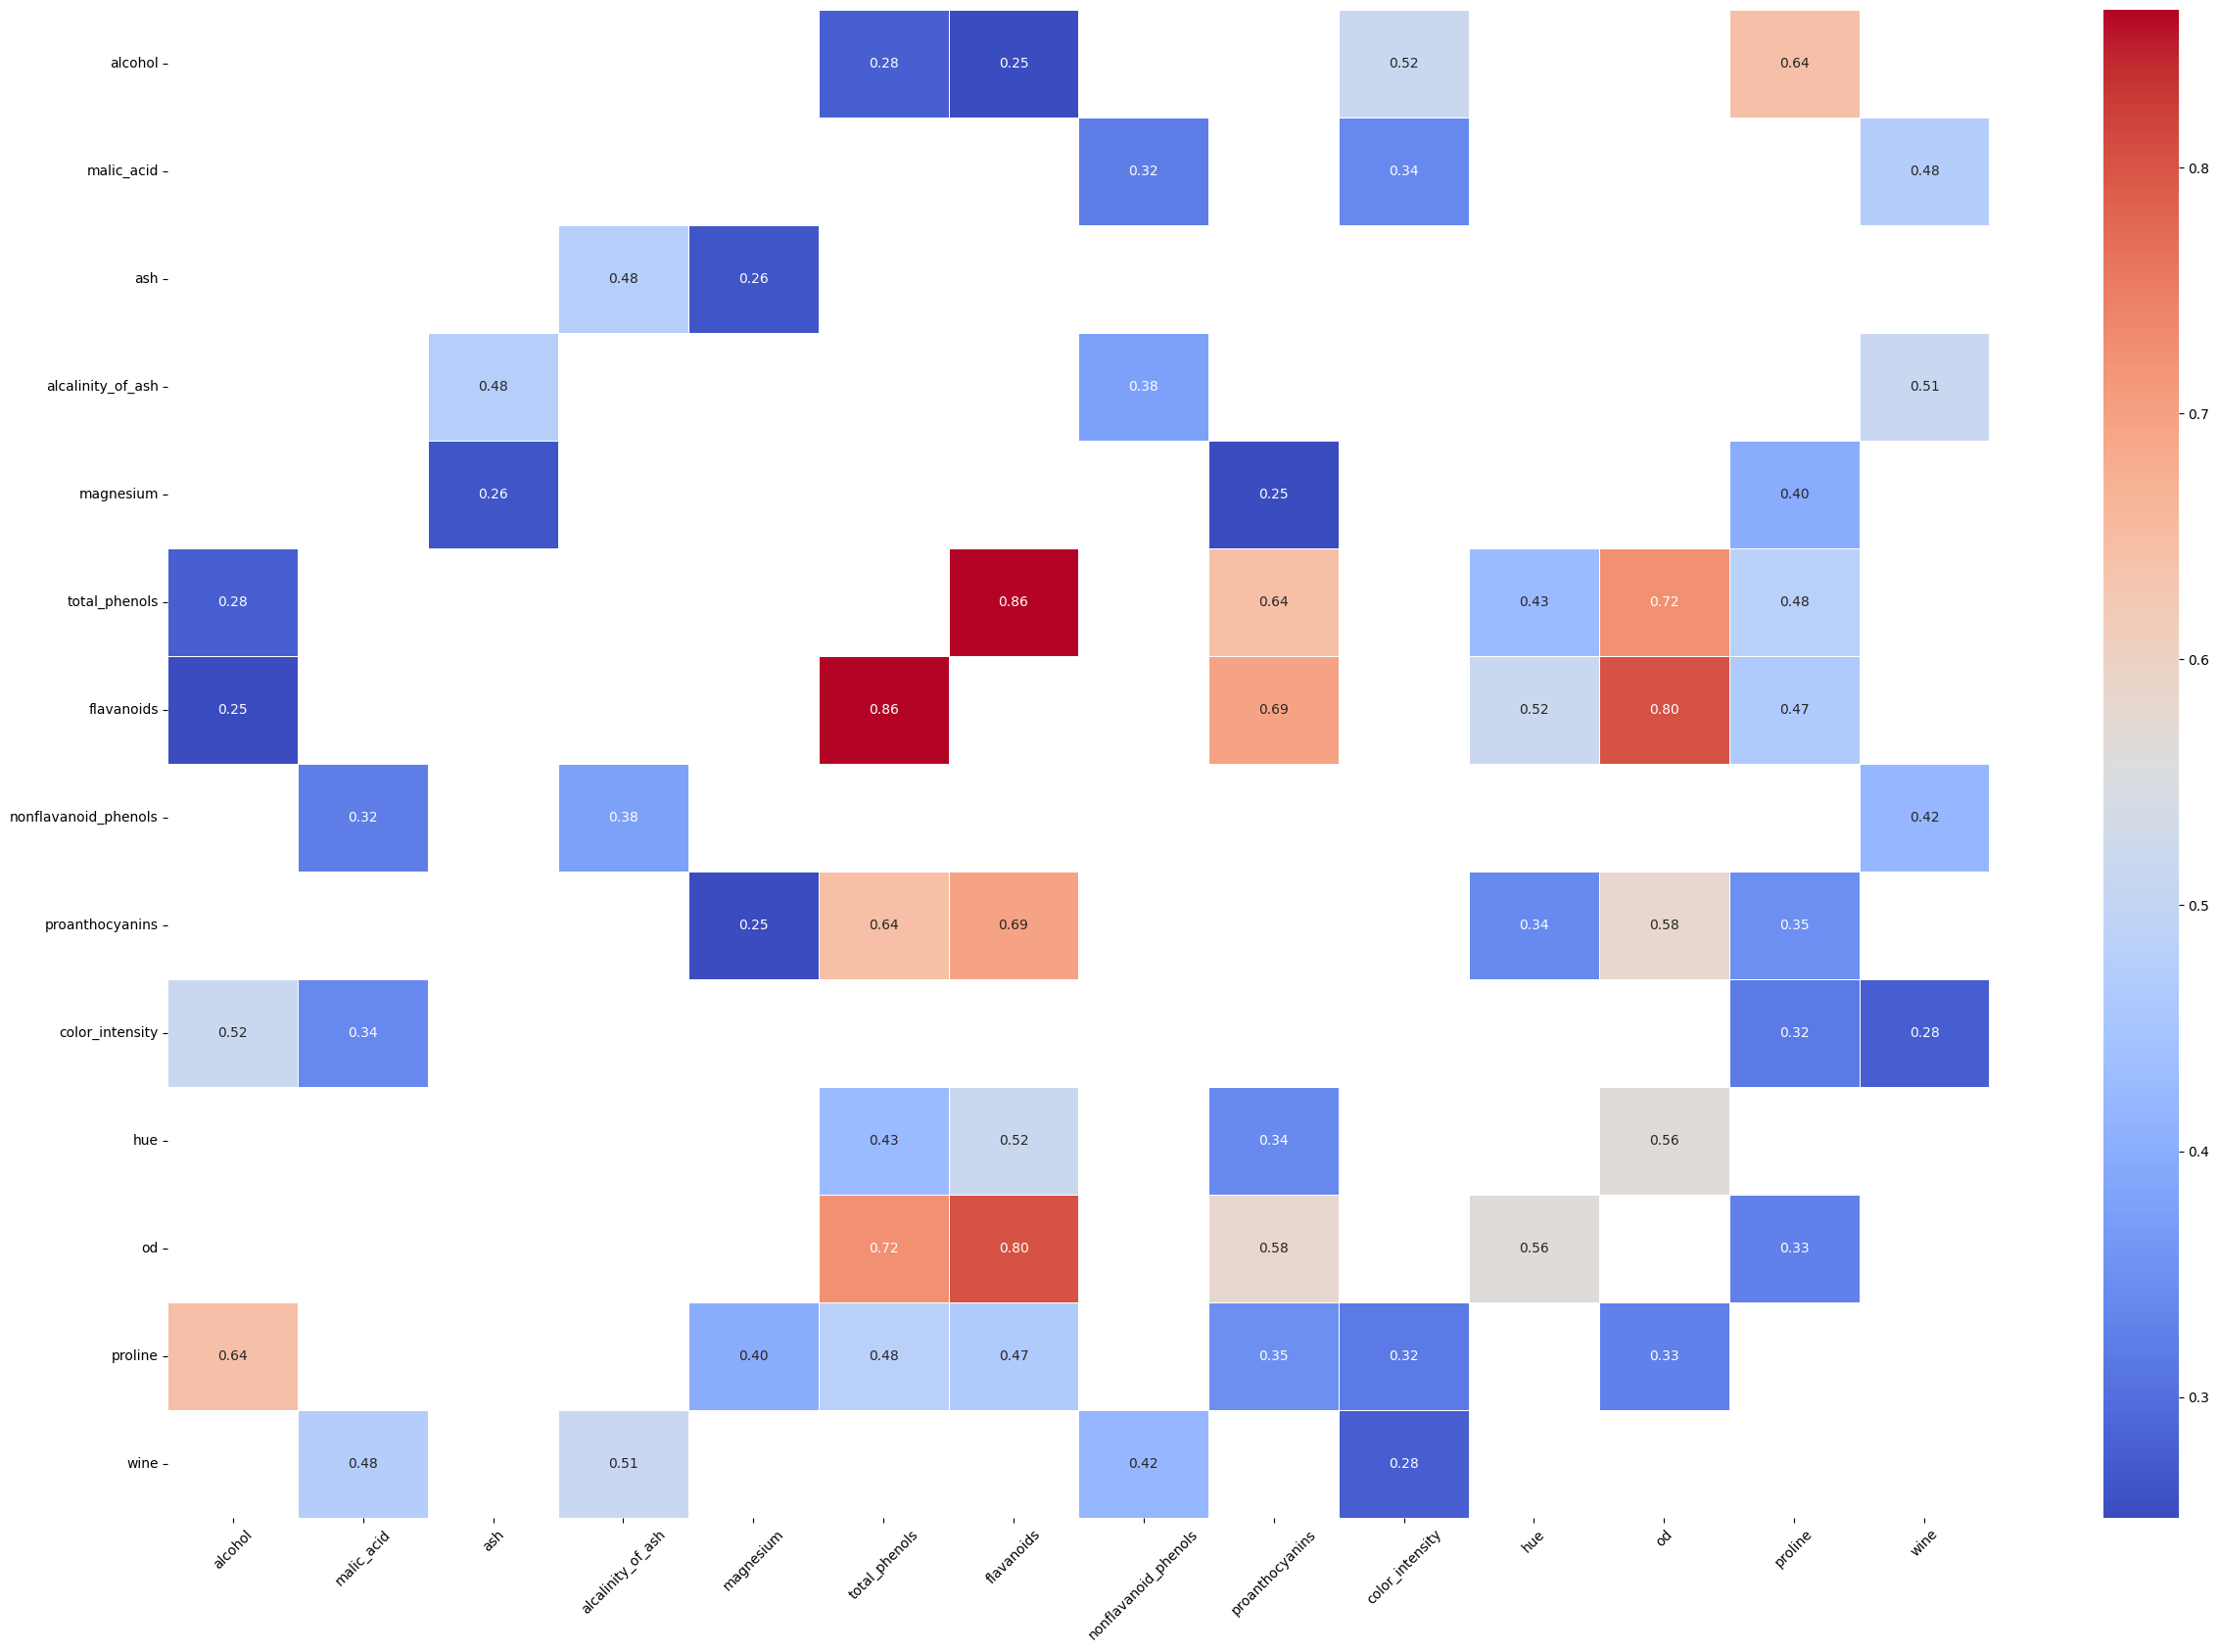

In [ ]:
corrdf = df.corr()


filtered_corr = corrdf.where((corrdf >= 0.25) & (corrdf != 1.0))
correlated_columns = set()


for column in filtered_corr.columns:
    correlated_columns.update(filtered_corr[column].dropna().index)

#list set
correlated_columns = list(correlated_columns)

print(correlated_columns)
filtered_corrdf = corrdf[(corrdf >= 0.25) & (corrdf != 1.0)]
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_corrdf, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['wine']=df['wine'].astype(str)
(ggplot(data=df,mapping=aes(x='total_phenols',y='flavanoids',color='wine')) +
geom_point())


In [ ]:
df['wine']=df['wine'].astype(str)
(ggplot(data=df,mapping=aes(x='od',y='flavanoids',color='wine')) +
geom_point())


In [ ]:
df['wine']=df['wine'].astype(str)
(ggplot(data=df,mapping=aes(x='proanthocyanins',y='flavanoids',color='wine')) +
geom_point())

In [ ]:
df['wine']=df['wine'].astype(str)
(ggplot(data=df,mapping=aes(x='total_phenols',y='proanthocyanins',color='wine')) +
geom_point())

In [ ]:
y = df['wine']  # target
X = df.drop('wine', axis=1)  # features

results = []

import random
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


def test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

results = []

for _ in range(1, 100):
    e = random.randint(1, 300)
    d = random.randint(1, 300)
    r = random.randint(1, 300)
    k = random.randint(1, 50)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r, stratify=y)

    original_distribution = dict(Counter(y_train))

    # RandomForest
    rf_clf = RandomForestClassifier(max_depth=d, n_estimators=e, random_state=r, class_weight='balanced')
    rf_metrics = test_model(rf_clf, X_train, y_train, X_test, y_test)

    # K-Nearest Neighbors
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_metrics = test_model(knn_clf, X_train, y_train, X_test, y_test)

    results.append({
        'n_estimators': e, 'max_depth': d, 'random_state': r,
        'original_distribution': original_distribution,
        'rf_accuracy': rf_metrics['accuracy'],
        'rf_precision': rf_metrics['precision'],
        'rf_recall': rf_metrics['recall'],
        'rf_f1_score': rf_metrics['f1_score'],
        'knn_n_neighbors': k,
        'knn_accuracy': knn_metrics['accuracy'],
        'knn_precision': knn_metrics['precision'],
        'knn_recall': knn_metrics['recall'],
        'knn_f1_score': knn_metrics['f1_score']
    })

results_df = pd.DataFrame(results)
results_df


,n_estimators,max_depth,random_state,original_distribution,rf_accuracy,rf_precision,rf_recall,rf_f1_score,knn_n_neighbors,knn_accuracy,knn_precision,knn_recall,knn_f1_score
0,63,242,15,"{'1': 33, '0': 27, '2': 23}",0.972222,0.974074,0.972222,0.972097,11,0.694444,0.680247,0.694444,0.681811
1,264,105,249,"{'1': 33, '2': 23, '0': 27}",0.972222,0.974747,0.972222,0.972369,7,0.611111,0.646154,0.611111,0.623953
2,239,5,98,"{'1': 33, '2': 23, '0': 27}",0.972222,0.974359,0.972222,0.972263,28,0.722222,0.728836,0.722222,0.722222
3,299,179,123,"{'2': 23, '1': 33, '0': 27}",1.000000,1.000000,1.000000,1.000000,48,0.777778,0.776934,0.777778,0.742347
4,295,274,51,"{'2': 23, '0': 27, '1': 33}",0.972222,0.974359,0.972222,0.972263,20,0.694444,0.701178,0.694444,0.696943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,263,28,259,"{'2': 23, '0': 27, '1': 33}",0.972222,0.974747,0.972222,0.972369,24,0.777778,0.781454,0.777778,0.774237
95,91,127,266,"{'0': 27, '1': 33, '2': 23}",0.944444,0.949106,0.944444,0.943525,6,0.694444,0.698524,0.694444,0.695767
96,45,104,243,"{'1': 33, '0': 27, '2': 23}",0.972222,0.974359,0.972222,0.972263,10,0.694444,0.682870,0.694444,0.679352
97,187,147,250,"{'1': 33, '2': 23, '0': 27}",0.916667,0.917284,0.916667,0.915910,28,0.666667,0.669543,0.666667,0.666073


In [ ]:


# for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']:
#     replace_key = f'replace_{i}'
#     replacement_dict = replacements[0].get(replace_key, {})
#     if replacement_dict:
#         df_pre[i] = df_pre[i].replace(replacement_dict)

# # df_pre=df_pre[['emp.var.rate', 'housing', 'pdays', 'loan', 'contact', 'month', 'nr.employed', 'cons.price.idx', 'euribor3m', 'cons.conf.idx', 'poutcome']]
# df_pre


<ipython-input-7-21bb485aa99b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pre[i] = df_pre[i].replace(replacement_dict)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,1,0,2,2,1,0,0,6,1,2,999,0,2,1.4,93.918,-42.7,4.962,5228.1
1,33,0,0,1,0,1,0,0,4,1,1,999,0,2,-1.8,92.893,-46.2,1.344,5099.1
2,45,0,2,0,0,0,1,0,5,2,1,3,2,2,-1.7,94.055,-39.8,0.739,4991.6
3,37,0,2,1,0,1,0,1,5,4,12,999,0,2,1.4,94.465,-41.8,4.959,5228.1
4,34,0,1,1,0,0,0,0,10,2,1,999,0,2,-0.1,93.200,-42.0,4.120,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,41,1,0,2,0,1,0,0,4,2,2,999,0,2,-1.8,92.893,-46.2,1.334,5099.1
4115,42,8,0,4,0,1,0,1,4,0,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0
4116,36,0,1,0,0,1,0,1,5,0,2,999,0,2,1.4,94.465,-41.8,4.960,5228.1
4117,27,3,1,0,0,1,0,0,2,0,1,6,1,2,-1.8,93.369,-34.8,0.652,5008.7


In [ ]:
df_pre=pd.read_csv('/content/wine-holdout.csv')
df_pre

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.100000,0.96,3.36,845
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510
5,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.200000,1.07,2.65,1280
6,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564
7,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
8,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.650000,0.96,3.26,680
9,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780


In [ ]:
y = df['wine']  # target
X = df.drop('wine', axis=1)  # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

clf = RandomForestClassifier(warm_start=False, n_estimators=63, random_state=15, max_depth=242)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Cambiar a average='weighted' para tener en cuenta la frecuencia de cada clase
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para multiclase
print("Confusion Matrix:\n", cm)

# Si deseas obtener información detallada sobre cada clase, puedes iterar sobre la matriz:
for i in range(len(cm)):
    print(f"Class {i} - TP: {cm[i, i]}, FP: {cm[i, :].sum() - cm[i, i]}, FN: {cm[:, i].sum() - cm[i, i]}, TN: {cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

new_pred = clf.predict(df_pre)

predictions = pd.DataFrame(new_pred, columns=['predictions'])

predictions.to_csv("alejo-ice1-predictions.csv", index=False)


Confusion Matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]
Class 0 - TP: 11, FP: 1, FN: 0, TN: 24
Class 1 - TP: 14, FP: 0, FN: 1, TN: 21
Class 2 - TP: 10, FP: 0, FN: 0, TN: 26
Accuracy: 0.9722222222222222
Precision: 0.974074074074074
Recall: 0.9722222222222222
F1 Score: 0.972097284690988
